In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import random
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
sdir=r'/content/drive/MyDrive/Masters/Data Mining Final/Dataset/archive/'

def make_dataframes(sdir):
    bad_images=[]
    classes=[ 'cheetah', 'fox', 'hyena','lion','tiger', 'wolf']
    filepaths=[]
    labels=[]
    all_data = {}
    classlist=sorted(os.listdir(sdir) )     
    for klass in classlist:
        classpath=os.path.join(sdir, klass)
        subdir=os.listdir(classpath)[0]
        subpath=os.path.join(classpath,  subdir)
        if os.path.isdir(subpath):
            flist=sorted(os.listdir(subpath)) 
            for i in range (len(classes)):
                if classes[i] in classpath:
                    klass=classes[i]
            desc=f'{klass:10s}-{subdir:17s}'
            # count = 0
            for f in tqdm(flist, ncols=130,desc=desc, unit='files', colour='blue'):
                # if count <=100:
                  # count+=1
                  fpath=os.path.join(subpath,f)
                  try:
                      img=cv2.imread(fpath)
                      shape=img.shape
                      all_data[fpath] = klass
                  except:
                      bad_images.append(fpath)                    
    return all_data

In [ ]:
all_data = make_dataframes(sdir)
l = list(all_data.items())
random.shuffle(l)
all_data = dict(l)
filepaths = []
labels = []

for entry in all_data:
  filepaths.append(entry)
  labels.append(all_data[entry])

training = filepaths[:int(len(filepaths)*0.8)]
validation = filepaths[int(len(filepaths)*0.8):int(len(filepaths)*0.9)] 
testing = filepaths[int(len(filepaths)*0.9):] 

train_label = labels[:int(len(labels)*0.8)]
valid_label = labels[int(len(labels)*0.8):int(len(labels)*0.9)] 
test_label = labels[int(len(labels)*0.9):] 

wolf      -wolf-resize-512  : 100%|██████████████████████████████████████████████████████████| 263/263 [00:08<00:00, 29.41files/s]


In [ ]:
x_train = []
for img in training:
    img_arr=cv2.imread(img)
    img_arr=cv2.resize(img_arr,(224,224))
    x_train.append(img_arr)

x_test=[]
for img in testing:
    img_arr=cv2.imread(img)
    img_arr=cv2.resize(img_arr,(224,224))
    x_test.append(img_arr)

x_val=[]
for img in validation:
    img_arr=cv2.imread(img)
    img_arr=cv2.resize(img_arr,(224,224))
    x_val.append(img_arr)


In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_x.shape,test_x.shape,val_x.shape

((1454, 224, 224, 3), (182, 224, 224, 3), (182, 224, 224, 3))

In [ ]:
nsamples, nx, ny, nrgb = train_x.shape
reshaped_train = train_x.reshape((nsamples,nx*ny*nrgb))

nsamples_test, nx_test, ny_test, nrgb_test = test_x.shape
reshaped_test = test_x.reshape((nsamples_test,nx_test*ny_test*nrgb_test))

## Implementing a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model=RandomForestClassifier(verbose = 1,n_estimators=150,max_depth=5)
model.fit(reshaped_train,train_label)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   40.2s finished


RandomForestClassifier(max_depth=5, n_estimators=150, verbose=1)

In [ ]:
y_pred=model.predict(reshaped_test)
accuracy_score(y_pred,test_label)
print(classification_report(y_pred,test_label))
confusion_matrix(y_pred,test_label)

              precision    recall  f1-score   support

     cheetah       0.85      0.88      0.86        32
         fox       0.92      0.82      0.87        28
       hyena       0.83      0.68      0.75        37
        lion       0.71      0.90      0.79        30
       tiger       0.86      0.93      0.89        27
        wolf       1.00      0.96      0.98        28

    accuracy                           0.85       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.86      0.85      0.85       182



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


array([[28,  1,  0,  3,  0,  0],
       [ 3, 23,  2,  0,  0,  0],
       [ 0,  1, 25,  8,  3,  0],
       [ 2,  0,  1, 27,  0,  0],
       [ 0,  0,  2,  0, 25,  0],
       [ 0,  0,  0,  0,  1, 27]], dtype=int64)

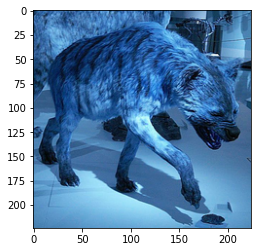

['fox']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [ ]:
img_path = x_test[0]
plt.imshow(img_path)
plt.show()
y_pred=model.predict(x_test[0].reshape(1,224*224*3))
print(y_pred)

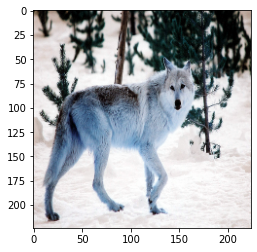

['wolf']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [ ]:
img_path = val_x[1]
plt.imshow(img_path)
plt.show()
y_pred=model.predict(val_x[1].reshape(1,224*224*3))
print(y_pred)

## Implementing KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(reshaped_train,train_label)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred_knn=knn.predict(reshaped_test)

In [ ]:
accuracy_score(test_label,y_pred_knn)
print(classification_report(test_label,y_pred_knn))
confusion_matrix(test_label,y_pred_knn)

              precision    recall  f1-score   support

     cheetah       0.39      0.52      0.44        33
         fox       0.43      0.36      0.39        25
       hyena       0.35      0.53      0.42        30
        lion       0.71      0.71      0.71        38
       tiger       0.29      0.07      0.11        29
        wolf       0.50      0.48      0.49        27

    accuracy                           0.46       182
   macro avg       0.44      0.44      0.43       182
weighted avg       0.45      0.46      0.44       182



array([[17,  0,  8,  3,  2,  3],
       [ 3,  9,  6,  2,  1,  4],
       [ 6,  3, 16,  3,  1,  1],
       [ 6,  1,  1, 27,  0,  3],
       [ 9,  7,  8,  1,  2,  2],
       [ 3,  1,  7,  2,  1, 13]], dtype=int64)

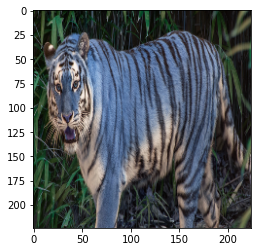

['fox']


In [ ]:
img_path = x_test[10]
plt.imshow(img_path)
plt.show()
y_pred=knn.predict(x_test[0].reshape(1,224*224*3))
print(y_pred)

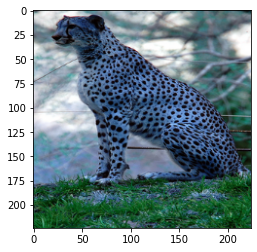

['hyena']


In [ ]:
img_path = val_x[5]
plt.imshow(img_path)
plt.show()
y_pred=knn.predict(val_x[5].reshape(1,224*224*3))
print(y_pred)

## Implementing a Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(reshaped_train,train_label)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc=dtc.predict(reshaped_test)

In [ ]:
accuracy_score(test_label,y_pred_dtc)
print(classification_report(test_label,y_pred_dtc))
confusion_matrix(test_label,y_pred_dtc)

              precision    recall  f1-score   support

     cheetah       0.97      0.88      0.92        33
         fox       0.79      0.88      0.83        25
       hyena       0.78      0.83      0.81        30
        lion       0.84      0.82      0.83        38
       tiger       0.79      0.90      0.84        29
        wolf       0.91      0.74      0.82        27

    accuracy                           0.84       182
   macro avg       0.84      0.84      0.84       182
weighted avg       0.85      0.84      0.84       182



array([[29,  0,  2,  1,  1,  0],
       [ 0, 22,  1,  0,  2,  0],
       [ 0,  1, 25,  1,  3,  0],
       [ 1,  4,  0, 31,  1,  1],
       [ 0,  0,  0,  2, 26,  1],
       [ 0,  1,  4,  2,  0, 20]], dtype=int64)

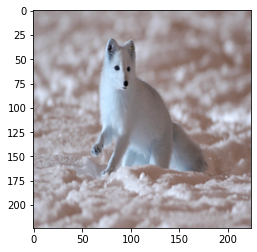

['hyena']


In [ ]:
img_path = x_test[3]
plt.imshow(img_path)
plt.show()
y_pred=dtc.predict(x_test[3].reshape(1,224*224*3))
print(y_pred)

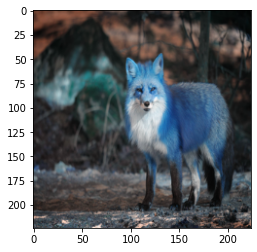

['fox']


In [ ]:
img_path = val_x[2]
plt.imshow(img_path)
plt.show()
y_pred=dtc.predict(val_x[2].reshape(1,224*224*3))
print(y_pred)

## Implementing Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(reshaped_train,train_label)

GaussianNB()

In [ ]:
y_pred_nb=nb.predict(reshaped_test)

In [ ]:
accuracy_score(test_label,y_pred_nb)
print(classification_report(test_label,y_pred_nb))
confusion_matrix(test_label,y_pred_nb)

              precision    recall  f1-score   support

     cheetah       0.35      0.52      0.42        33
         fox       0.25      0.04      0.07        25
       hyena       0.32      0.40      0.36        30
        lion       0.47      0.42      0.44        38
       tiger       0.46      0.45      0.46        29
        wolf       0.39      0.44      0.41        27

    accuracy                           0.39       182
   macro avg       0.38      0.38      0.36       182
weighted avg       0.38      0.39      0.37       182



array([[17,  1,  6,  4,  1,  4],
       [ 5,  1,  3,  4,  3,  9],
       [ 7,  0, 12,  5,  4,  2],
       [10,  0,  8, 16,  3,  1],
       [ 5,  1,  4,  3, 13,  3],
       [ 4,  1,  4,  2,  4, 12]], dtype=int64)

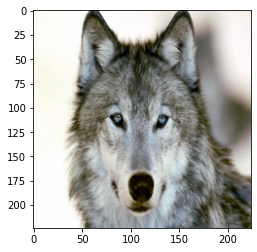

['wolf']


In [ ]:
img_path = val_x[70]
plt.imshow(img_path)
plt.show()
y_pred=nb.predict(val_x[70].reshape(1,224*224*3))
print(y_pred)

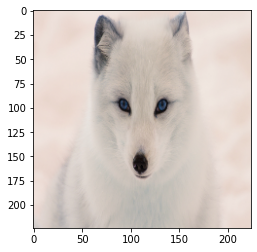

['wolf']


In [ ]:
img_path = val_x[51]
plt.imshow(img_path)
plt.show()
y_pred=nb.predict(val_x[51].reshape(1,224*224*3))
print(y_pred)

## Visualizing Results

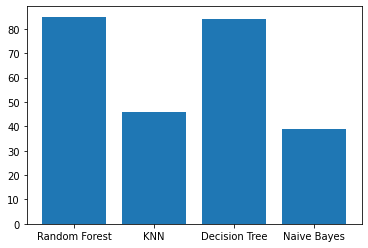

In [ ]:
algo_name = ["Random Forest","KNN","Decision Tree","Naive Bayes"]
accuracy_graph = [85,46,84,39]
plt.bar(algo_name,accuracy_graph)
plt.show()